## Capacitor de placas paralelas

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [46]:
N= 6
L = 12
d =10
Delta = L/N

In [47]:
centers = []
void = []

for k in range(0, 2):
    for j in range(1, N+1):
        for i in range(1, N+1):
            centers.append([int(j*Delta - Delta/2), int(i*Delta - Delta/2), k*d])
            if(i<=N/2 or j<=N/2):
                void.append(0)
            else:
                #centers.append([0, 0, k*d])
                void.append(1)
                
    

In [48]:
epsilon0 = 8.85e-12
impedances = []

for m in range(0, 2*N*N):
    impedances.append([])
    for n in range(0, 2*N*N):
        if m == n:
            # zmn = delta/piE0 * ln[1 + raiz(2)]
            zmn = (Delta/(math.pi * epsilon0))*(math.log(1 + math.sqrt(2)))
            impedances[m].append(zmn)
        #
        elif(void[m] == 1):
            zmn = 0
            impedances[m].append(zmn)
        else:
            # zmn = 1/4piE0 * delta²/raiz[(xp - xi)² + (yq - yj)² + (zs - zk)²]
            zmn = 1/(4 * math.pi * epsilon0) * pow(Delta, 2)/math.sqrt(pow(centers[m][0] - centers[n][0], 2) + pow(centers[m][1] - centers[n][1], 2) + pow(centers[m][2] - centers[n][2], 2))
            impedances[m].append(zmn)

In [49]:
tensions = []
V0 = 20
for n in range(0, int(2*N*N)):
    if(void[n]==1):
        tensions.append(0)
    elif(n < N*N):
        tensions.append(0)
    else:
        tensions.append(V0)

Determinando os coeficientes an ao resolver o sistema de equações lineares:

In [50]:
coefficients = np.linalg.solve(impedances, tensions)
print(coefficients)
for i in range(len(coefficients)):
    if(coefficients[i] == 0.00000000e+00):
        coefficients[i] = math.nan

[-3.81063414e-11 -2.86456830e-11 -2.82309122e-11 -2.81771389e-11
 -2.84498614e-11 -3.75673685e-11 -2.86456830e-11 -1.85972299e-11
 -1.83858284e-11 -1.84750259e-11 -1.88158897e-11 -2.88072172e-11
 -2.82309122e-11 -1.83858284e-11 -1.94835917e-11 -2.46946819e-11
 -2.78437431e-11 -3.80655035e-11 -2.81771389e-11 -1.84750259e-11
 -2.46946819e-11  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.84498614e-11 -1.88158897e-11 -2.78437431e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.75673685e-11 -2.88072172e-11
 -3.80655035e-11  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.35016296e-10  9.26862854e-11  8.83980078e-11  8.90738787e-11
  9.46112277e-11  1.39447569e-10  9.26862854e-11  5.11897989e-11
  4.85901609e-11  4.98430758e-11  5.47007452e-11  1.00382866e-10
  8.83980078e-11  4.85901609e-11  5.02893224e-11  6.76778096e-11
  8.34702153e-11  1.32327945e-10  8.90738787e-11  4.98430758e-11
  6.76778096e-11  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.46112277e-11  5.47007

In [51]:
print(coefficients)

[-3.81063414e-11 -2.86456830e-11 -2.82309122e-11 -2.81771389e-11
 -2.84498614e-11 -3.75673685e-11 -2.86456830e-11 -1.85972299e-11
 -1.83858284e-11 -1.84750259e-11 -1.88158897e-11 -2.88072172e-11
 -2.82309122e-11 -1.83858284e-11 -1.94835917e-11 -2.46946819e-11
 -2.78437431e-11 -3.80655035e-11 -2.81771389e-11 -1.84750259e-11
 -2.46946819e-11             nan             nan             nan
 -2.84498614e-11 -1.88158897e-11 -2.78437431e-11             nan
             nan             nan -3.75673685e-11 -2.88072172e-11
 -3.80655035e-11             nan             nan             nan
  1.35016296e-10  9.26862854e-11  8.83980078e-11  8.90738787e-11
  9.46112277e-11  1.39447569e-10  9.26862854e-11  5.11897989e-11
  4.85901609e-11  4.98430758e-11  5.47007452e-11  1.00382866e-10
  8.83980078e-11  4.85901609e-11  5.02893224e-11  6.76778096e-11
  8.34702153e-11  1.32327945e-10  8.90738787e-11  4.98430758e-11
  6.76778096e-11             nan             nan             nan
  9.46112277e-11  5.47007

C:\Users\ADRIAN~1\AppData\Local\Temp/ipykernel_11132/537761573.py:19: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)
C:\Users\ADRIAN~1\AppData\Local\Temp/ipykernel_11132/537761573.py:34: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)


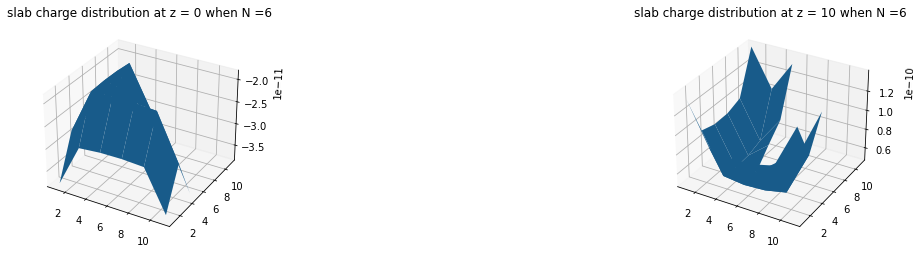

In [52]:
centers = np.array(centers)
X = centers[:len(centers)//2, 1]
Y = centers[:len(centers)//2, 0]
Z = np.array(coefficients[:len(coefficients)//2])

X = np.reshape(X,(N,N))
Y = np.reshape(Y,(N,N))
Z = np.reshape(Z,(N,N))

#print(X)
#print(Y)
#print(Z)

# Gráfico plotado para a placa em z = 0
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title('slab charge distribution at z = 0 when N =' + str(N))
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)

# Para a placa superior, com $z = d$:
# X, Y e Z são setados de acordo com os N*N últimos quadrados discretizados
X = centers[len(centers)//2:len(centers), 1]
Y = centers[len(centers)//2:len(centers), 0]
Z = np.array(coefficients[len(coefficients)//2:len(coefficients)])

X = np.reshape(X,(N,N))
Y = np.reshape(Y,(N,N))
Z = np.reshape(Z,(N,N))

# Gráfico plotado para a placa em z = d
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title('slab charge distribution at z = ' + str(d) + ' when N =' + str(N))
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)

plt.show()